# MNIST com Tensorflow

Resolveremos agora o mesmo problema utilizando diferentes bibliotecas, apenas Numpy; Keras; Tensorflow e Pytorch. A ideia, aqui, é que você tenha uma experiência com cada uma delas para aí poder saber diferencias quando utilizar cada uma na melhor situação.


In [153]:
# Import MNIST data
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [154]:
# check MNIST training images matrix shape
mnist.train.images.shape

(55000, 784)

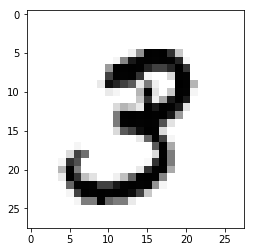

In [155]:
# check MNIST training images matrix data
sample_img = mnist.train.images[1].reshape(28, 28)
# plot the image
plt.imshow(sample_img).set_cmap('Greys')

In [156]:
# check MNIST labels shape
mnist.train.labels.shape

(55000, 10)

In [157]:
# show MNIST label data
sample_label = mnist.train.labels[1]
sample_label

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

# Construindo nossa Rede Neural


## Hiperparâmetros

In [158]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

## Construcao da rede

In [159]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

## Inicialização

In [160]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()
saver = tf.train.Saver()

## Treinamento

In [161]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))
    print ("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    save_path = saver.save(sess, "./tmp/model.ckpt")
    print("Model saved in file: %s" % save_path)

Epoch: 0001 cost= 193.890698266
Epoch: 0002 cost= 44.969539071
Epoch: 0003 cost= 27.990002204
Epoch: 0004 cost= 19.522133673
Epoch: 0005 cost= 14.263742397
Epoch: 0006 cost= 10.621454796
Epoch: 0007 cost= 7.977389799
Epoch: 0008 cost= 5.931062013
Epoch: 0009 cost= 4.440852302
Epoch: 0010 cost= 3.319992121
Epoch: 0011 cost= 2.439423218
Epoch: 0012 cost= 1.955467022
Epoch: 0013 cost= 1.413456047
Epoch: 0014 cost= 1.054891020
Epoch: 0015 cost= 0.871857713
Optimization Finished!
Accuracy: 0.9452
Model saved in file: ./tmp/model.ckpt
